# Trabajo Práctico 1 
## Grupo 2
Alex Rodriguez, 20250587  
Leonel Contreras, 20170129  
Isabel Prado, 20250510  
Kevin Morales, 20250728  
Celeste Castañeda, 20250363  



## Definición de funciones

Considere la función de distribución acumulada (CDF) de una variable aleatoria Normal Estándar $X$ que viene dada por:

$ \text{CDF}(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x} e^{-\frac{x^2}{2}} \, dx $

Podemos aproximar esta integral impropia utilizando el esquema numérico que es preciso con 6 decimales:

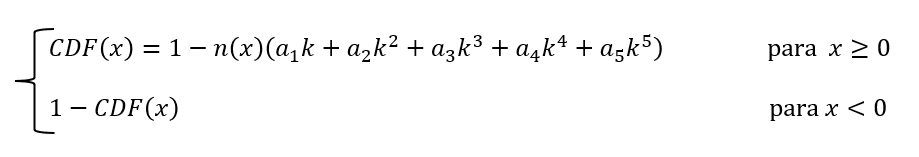


Donde:

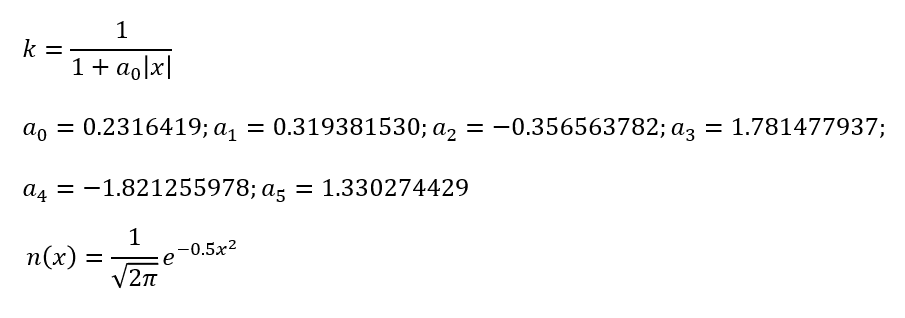


Defina una función para aproximar $CDF(x)$ ingresando por teclado el número $x$.

In [ ]:
# Utilizar las siguientes contanstes en la función a definir
(a0, a1,a2,a3,a4,a5) = (0.2316419, 0.319381530, -0.356563782, 1.781477937, -1.821255978, 1.330274429)

In [1]:
# importamos el modulo math
import math as mathLib

# Definimos una tupla con los coeficientes
coeffs = (0.2316419, 0.319381530, -0.356563782, 1.781477937, -1.821255978, 1.330274429)

# Pedimos al usuario que ingrese el valor de p
p_value = int(input("Ingrese el valor de p (por ejemplo, 1 para imprimir info, 0 para no): "))

# set k const
def set_k(x: float, p=0) -> float:
    # calculamos el valor de k
    k_value = 1 / (1 + coeffs[0] * mathLib.fabs(x))
    # redondeamos a 7 decimales
    k_value = round(k_value, 7)
    # imprimimos el valor si p == 1
    if p == 1:
        print(f"\nk = {k_value}\n")
    # retornamos el valor
    return k_value

# set n const
def set_n(x: float, p=0):
    # calculamos el valor de n
    n_x = 1 / (mathLib.sqrt(2 * mathLib.pi)) * (mathLib.exp(-0.5 * (mathLib.pow(x, 2))))
    # redondeamos a 7 decimales
    n_x = round(n_x, 7)
    # imprimimos si p == 1
    if p == 1:
        print(f"n({x}) = {n_x}\n")
    # retornamos valor
    return n_x

# set CDF
def CDF(x: float, p=1) -> float:
    # usamos las funciones con p pasado como parámetro
    k = set_k(x, p)
    n_x = set_n(x, p)
    a_k = 0

    # iterar para calcular la sumatoria
    for i in range(1, 6):
        a_k += coeffs[i] * mathLib.pow(k, i)
        print(f"a{i}*k^{i} -> {round(a_k, 7)}")
    
    # ecuación
    cdf = 1 - n_x * a_k
    
    # ajustar según signo de x
    if x >= 0:
        return round(cdf, 7)
    else:
        return 1 - round(cdf, 7)

# Pedir el valor de x
user_input = float(input("Ingrese el valor de X: "))

# Llamar a la función con p ingresado por usuario
print(f"\nCDF({user_input}) = {CDF(user_input, p_value)}")

Ingrese el valor de p (por ejemplo, 1 para imprimir info, 0 para no):  0
Ingrese el valor de X:  -1


a1*k^1 -> 0.2593136
a2*k^2 -> 0.0242593
a3*k^3 -> 0.9777733
a4*k^4 -> 0.1863056
a5*k^5 -> 0.6556795

CDF(-1.0) = 0.1586552


In [ ]:
#type(coeffs)


# Pruebas Unitarias para corroborar correcto funcionamiento de nuestras Funcion de Distribucion Acumulada

In [2]:
# importamos el modulo unittest
import unittest
# definimos la clase 
class TestCDFFunctionSpecifics(unittest.TestCase):
    # definimos los distintos metodos
    def test_at_zero(self):
        self.assertAlmostEqual(CDF(0), 0.5, places=2)

    def test_at_one(self):
        # Expected approximate value for standard normal CDF at 1
        self.assertAlmostEqual(CDF(1), 0.8413447, places=2)

    def test_at_minus_one(self):
        # Expected approximate value for standard normal CDF at -1
        self.assertAlmostEqual(CDF(-1), 0.1586553, places=2)

# Run the tests
unittest.main(argv=[''], verbosity=2, exit=False)

test_at_minus_one (__main__.TestCDFFunctionSpecifics) ... ok
test_at_one (__main__.TestCDFFunctionSpecifics) ... ok
test_at_zero (__main__.TestCDFFunctionSpecifics) ... 


k = 0.8119243

n(-1) = 0.2419707

a1*k^1 -> 0.2593136
a2*k^2 -> 0.0242593
a3*k^3 -> 0.9777733
a4*k^4 -> 0.1863056
a5*k^5 -> 0.6556795

k = 0.8119243

n(1) = 0.2419707

a1*k^1 -> 0.2593136
a2*k^2 -> 0.0242593
a3*k^3 -> 0.9777733
a4*k^4 -> 0.1863056
a5*k^5 -> 0.6556795

k = 1.0

n(0) = 0.3989423

a1*k^1 -> 0.3193815
a2*k^2 -> -0.0371823
a3*k^3 -> 1.7442957
a4*k^4 -> -0.0769603
a5*k^5 -> 1.2533141


ok

----------------------------------------------------------------------
Ran 3 tests in 0.004s

OK
